In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("sex_0902.csv",encoding = 'cp949')
# df.Date = pd.to_datetime(df.Date)

In [26]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류1    164 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [10]:
df.head()

,대분류1
0,성범죄
1,성범죄
2,해산
3,대통령지지
4,대통령탄핵


In [11]:
df.Class.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Class'

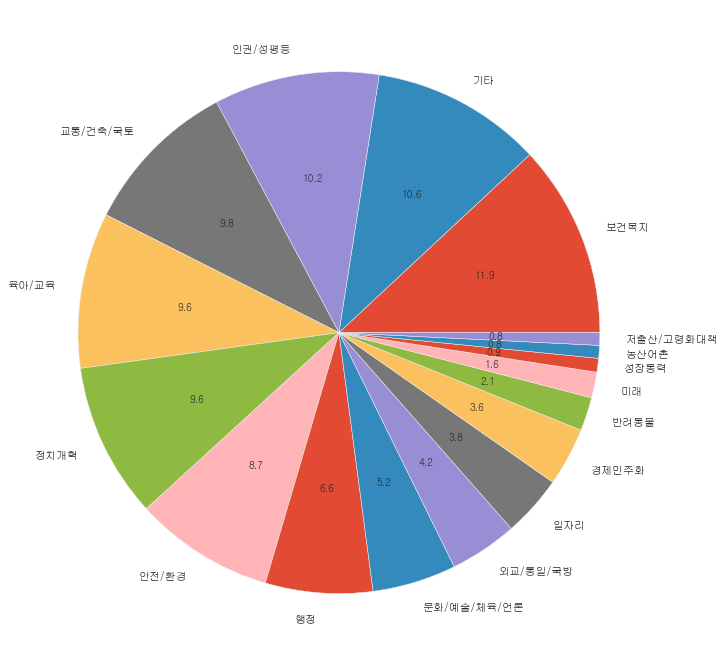

In [6]:
plt.pie(df.Class.value_counts(),labels = df.Class.value_counts().index,autopct = "%.1f")
plt.show()

In [20]:
df.Date.dt.year.value_counts()

2018    10511
2020     9668
2019     6513
2021     4849
2017      846
Name: Date, dtype: int64

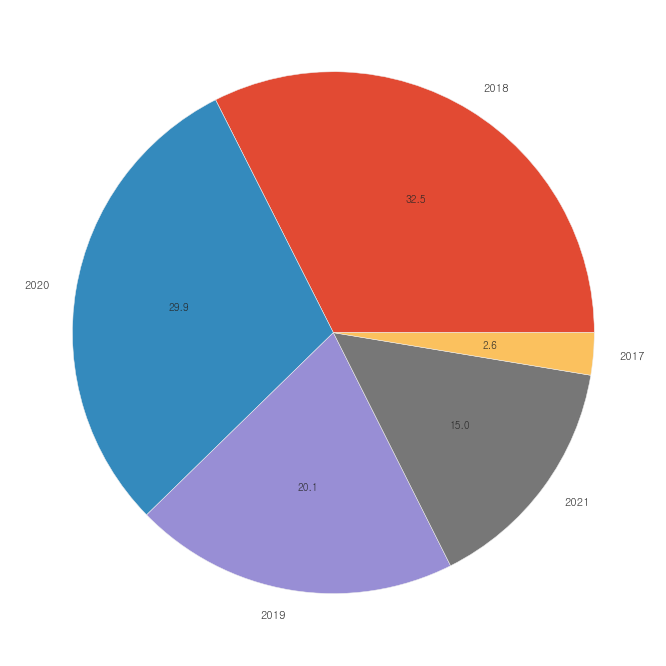

In [8]:
plt.pie(df.Date.dt.year.value_counts(),labels = df.Date.dt.year.value_counts().index,autopct = "%.1f")
plt.show()

In [9]:
df_200000 = df[df.Support>=200000].Support.count()
df_100000 = df[df.Support>=100000].Support.count() - df[df.Support>=200000].Support.count()
df_50000 = df[df.Support>=50000].Support.count() - df[df.Support>=100000].Support.count()
df_30000 = df[df.Support>=30000].Support.count() - df[df.Support>=50000].Support.count()
df_10000 = df[df.Support>=10000].Support.count() - df[df.Support>=30000].Support.count()
df_5000 = df[df.Support>=5000].Support.count() - df[df.Support>=10000].Support.count()
df_1000 = df[df.Support>=1000].Support.count() - df[df.Support>=5000].Support.count()
df_1000d = df[df.Support<1000].Support.count()


In [10]:

print("20만 이상 : {}건 \n10만 이상 : {}건 \n5만 이상 : {}건\n3만 이상 : {}건\n1만 이상 : {}건\n5천 이상 : {}명\n1천 이상 : {}건\n1천 미만 : {}건".
     format(df_200000,df_100000,df_50000,df_30000,df_10000,df_5000,df_1000,df_1000d))

20만 이상 : 253건 
10만 이상 : 129건 
5만 이상 : 286건
3만 이상 : 347건
1만 이상 : 1402건
5천 이상 : 1522명
1천 이상 : 8232건
1천 미만 : 20216건


## 워드 클라우드 생성

In [22]:
def word_cloud(text):
    
    ### 세종사전 실행
    from konlpy.tag import Twitter
    from collections import Counter
    from wordcloud import WordCloud
    twitter = Twitter()
    
    ### 단어리스트 만들기
    word_list= text.to_list()
    ### 형태소 분리
    sentences_tag = []

    for sentence in word_list:
       morph = twitter.pos(sentence)
       sentences_tag.append(morph)
    
    ## 명사만 추출
    noun_list = []
    for sentence in sentences_tag:
       for word, tag in sentence:
           if tag in ['Noun']:
               noun_list.append(word)
                
    ## 두 단어 이상만 추출
    len(noun_list)

    noun_list = [n for n in noun_list if len(n) > 1]
    noun_list[:100]
    
    ## 불용어 제거
    #stopwords = ["청원", '처벌', '대한', '요청', '반대', '국민', '사건', '조사', '촉구', '요구', '불법', '대한민국', '개선', '관련'
    #          ,'한국']


    #noun_list = [i for i in noun_list if i not in stopwords]
    print(word_list)
    ### 단어 카운트
    counts = Counter(word_list)
    tags = counts.most_common(40)

    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    
    df_tag = pd.DataFrame(data = tags)
    display(df_tag[:20].T)
    display(df_tag[20:].T)
    print()

    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

['호소', '처벌요청', '처벌요청', '호소', '호소', '법개정', '호소', '성범죄', '해산', '청소년범죄', '호소', '처벌요청', '수사요청', '처벌요청', '호소', '젠더갈등', '성범죄', '처벌요청', '아동성범죄', '호소', '실명거론', '아동성범죄', '처벌요청', '처벌요청', '처벌요청', '호소', '호소', '실명거론', '억울함', '젠더갈등', '호소', '성범죄', '처벌요청', '처벌요청', '호소', '호소', '처벌요청', '성범죄', '법개정', '호소', '억울함', '실명거론', '실명거론', '젠더갈등', '남학생', '호소', '호소', '법개정', '폭행', '호소', '호소', '호소', '여성', '호소', '법개정', '호소', '폐지요청', '처벌요청', '처벌요청', '처벌요청', '억울함', '젠더갈등', '법개정', '아동간성범죄', '실명거론', '약물범죄', '페미니즘', '성범죄', '성범죄', '사이버성범죄', '사이버성범죄', '실명거론', '아동성범죄', '실명거론', '피해자', '성범죄', '성범죄', '자살', '성전환', '판사', '성범죄', '청소년범죄', '성범죄', '청소년범죄', '성범죄', '성범죄', '아동성범죄', '아동성범죄', '성폭력', '실종', '호소', '여성', '무고죄', '호소', '폭행', '데이트폭력', '청소노동자', '초소형카메라', '아동성범죄', '처벌요청', '촉법소년', '사이버성범죄', '학교폭력', '호소', '처벌요청', '퀴어축제', '아동성범죄', '성인용품', '언론', '낙태죄', '여학생', '억울함', '여성의무할당제', '인권침해', '호소', '성범죄', '성범죄', '범죄자', '촉법소년', '성범죄', '성범죄', '아동학대', '호소', '성범죄', '청소', '폭행', '경찰비리', '젠더갈등', '인터넷사이트', '여성', '코로나', '사망사건', '실명거론', '사이버성범죄', '재조사', 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,호소,성범죄,처벌요청,실명거론,법개정,젠더갈등,아동성범죄,여성,억울함,사이버성범죄,청소년범죄,촉법소년,폭행,학교폭력,자살,판사,사망사건,해산,수사요청,남학생
1,27,17,16,9,8,7,7,6,5,5,4,4,3,3,2,2,2,1,1,1


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,폐지요청,아동간성범죄,약물범죄,페미니즘,피해자,성전환,성폭력,실종,무고죄,데이트폭력,청소노동자,초소형카메라,퀴어축제,성인용품,언론,낙태죄,여학생,여성의무할당제,인권침해,범죄자
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


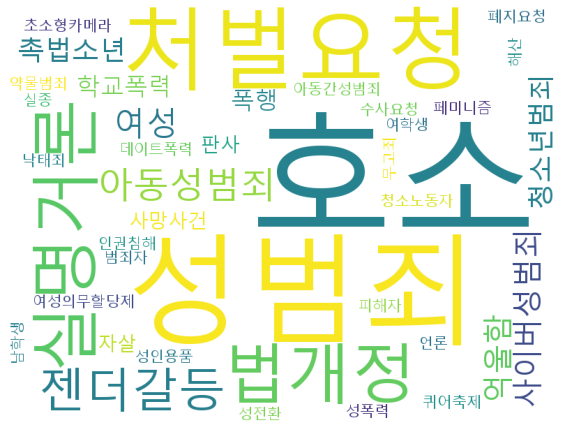

In [27]:
word_cloud(df.대분류1)